<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

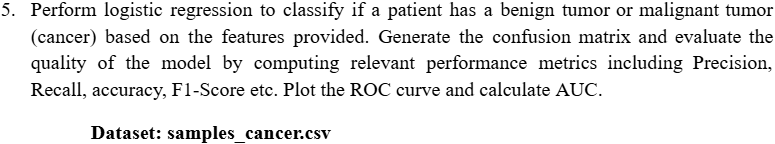

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, auc
)

In [ ]:
data = pd.read_csv("samples_cancer.csv")

print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nChecking for '?' entries:")
print((data == '?').sum())  # count of '?' per column

Dataset loaded successfully!
Shape: (699, 11)

Checking for '?' entries:
ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64


In [ ]:
data = data.replace('?', np.nan)
data = data.apply(pd.to_numeric, errors='ignore')

data = data.fillna(data.mean(numeric_only=True))

X = data.drop(columns=['ID', 'Class'])
y = data['Class']
y = y.replace({2: 0, 4: 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

/tmp/ipython-input-1787502683.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=["True Benign", "True Malignant"],
    columns=["Pred Benign", "Pred Malignant"]
)
print("\nConfusion Matrix:")
print(cm_df)


Confusion Matrix:
                Pred Benign  Pred Malignant
True Benign             112               3
True Malignant            5              55


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)


Model Performance:
Accuracy : 0.9543
Precision: 0.9483
Recall   : 0.9167
F1 Score : 0.9322

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97       115
   Malignant       0.95      0.92      0.93        60

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175



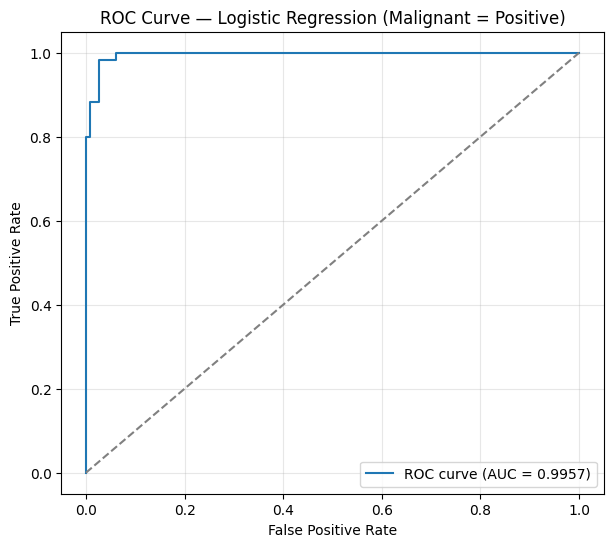

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression (Malignant = Positive)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
print(f"\nArea Under the Curve (AUC): {roc_auc:.4f}")

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nTop 10 Features Influencing Malignancy:")
print(coeff_df.head(10))


Area Under the Curve (AUC): 0.9957

Top 10 Features Influencing Malignancy:
       Feature  Coefficient
5      BareNuc     1.547061
0        Clump     1.217982
6   BlandChrom     0.799152
2    UnifShape     0.740599
8          Mit     0.659800
3      MargAdh     0.619205
7     NormNucl     0.503809
4  SingEpiSize     0.220249
1     UnifSize     0.114546
